# Training Linear Models

In [1]:
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

Linear regression formula: $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$
<ul>
ŷ is the predicted value.
<li>n is the number of features.
<li>xi is the ith feature value.
<li>θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).</ul>

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

## Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation 

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.12342866],
       [2.84357955]])

let’s compute θ using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.12342866],
       [9.81058776]])

this code computes the predicted target values (y_predict) for two new instances with feature values of 0 and 2, respectively, using a trained linear regression model that has been fit on a dataset with a single feature (X) and corresponding target values (y). The np.c_[] function is used to add the bias term to the new instances before making predictions.

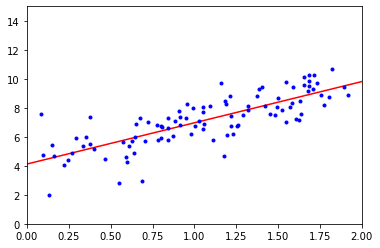

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_  ,'\n')
print(lin_reg.predict(X_new))

[4.12342866] [[2.84357955]] 

[[4.12342866]
 [9.81058776]]


LinearRegression class was based on the Normal Equation. This was an error, my apologies: as explained above, it is based on the pseudoinverse, which ultimately relies on the SVD matrix decomposition of X. The pseudoinverse is more efficient than the Normal Equation, especially when the number of features is large. The LinearRegression class is based on the pseudoinverse, not the Normal Equation.

In [14]:
lin_reg.predict([[10], [20]])

array([[32.55922417],
       [60.99501968]])

The Normal Equation computes the inverse of XT · X, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3) (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly 22.4 = 5.3 to 23 = 8.
The Normal Equation gets very slow when the number of features grows large (e.g., 100,000).
On the positive side, this equation is linear with regards to the number of instances in the training set (it is O(m)), so it handles large training sets efficiently, provided they can fit in memory.

## Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Concretely, you start by filling θ with random values (this is called random initializa‐ tion), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum<br>

learning rate defines the size of steps to be taken by the algorithmn should be careful not to choose a very low one that would take a long time to converge neither a very large one 
that would make the algorithm diverge.

 Two main challenges with Gradient Descent: if the ran‐ dom initialization starts the algorithm on the left, then it will converge to a local mini‐ mum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.<br>

 Its important to ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.


In [15]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.12342866],
       [2.84357955]])

<b style="font-size: 25px; color: red;">Batch Gradient Descent</b><br>
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [ ]:
# This function performs batch gradient descent, a type of optimization algorithm commonly used in machine learning
# to minimize a cost function

def batch_gradient_descent(X, y, theta, eta, n_iterations):
    """ 
    Performs batch gradient descent to minimize a cost function
    X: array of training examples
    y: array of target values
    theta: array of model parameters
    eta: learning rate
    n_iterations: number of iterations to perform
    """
    # Calculate the number of training examples in the dataset
    m = len(y)
    # Loop through the specified number of iterations
    for iteration in range(n_iterations):
        # Calculate the gradients of the cost function
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        # Update the model parameters using the gradients and the learning rate
        theta = theta - eta * gradients
    # Return the final values of the model parameters
    return theta

# theta_batch = batch_gradient_descent(X_b, y, theta, eta, n_iterations)


<b style="font-size: 25px; color: red;">Stochastic Gradient Descent</b><br>
At each step, instead of computing the gradients based on the full training set (as in Batch Gradient Descent), the algorithm just picks a random instance in the training set and computes the gradients based only on that single instance. This makes the algorithm much faster since it has very little data to manipulate at every iteration. As a result, this algorithm is well suited for online learning.


In [ ]:
# implementation of Stochastic Gradient Descent from scratch
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

In [ ]:
# This function performs stochastic gradient descent, a type of optimization algorithm commonly used in machine learning
# to minimize a cost function

def stochastic_gradient_descent(X, y, theta, n_epochs, t0, t1):
    """ 
    Performs stochastic gradient descent to minimize a cost function
    X: array of training examples
    y: array of target values
    theta: array of model parameters
    n_epochs: number of epochs to perform
    t0: learning schedule hyperparameter
    t1: learning schedule hyperparameter
    """
    # Calculate the number of training examples in the dataset
    m = len(y)
    # Loop through the specified number of epochs
    for epoch in range(n_epochs):
        # Loop through each training example
        for i in range(m):
            # Randomly select a training example
            random_index = np.random.randint(m)
            # Get the features and target value for the selected example
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            # Calculate the gradients of the cost function using the selected example
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            # Calculate the learning rate using a learning schedule
            eta = learning_schedule(epoch * m + i, t0, t1)
            # Update the model parameters using the gradients and the learning rate
            theta = theta - eta * gradients
    # Return the final values of the model parameters
    return theta

# theta_stochastic = stochastic_gradient_descent(X, y, theta, n_epochs, t0, t1)

In [ ]:
# implementing stochastic gradient descent using sklearn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iters=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

In [ ]:
print(sgd_reg.intercept_, sgd_reg.coef_)

<b style="font-size: 25px; color: red;">Mini-batch Gradient Descent</b><br>
The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand: at each step, instead of computing the gradients based on the full training set (as in Batch Gradient Descent), or based on just one instance (as in Stochastic Gradient Descent), the algorithm computes the gradients on small random sets of instances called mini-batches.

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

In [ ]:
# This function performs mini-batch gradient descent, a type of optimization algorithm commonly used in machine learning
# to minimize a cost function

def mini_batch_gradient_descent(X, y, theta, n_iterations, eta, minibatch_size):
    """ 
    Performs mini-batch gradient descent to minimize a cost function
    X: array of training examples
    y: array of target values
    theta: array of model parameters
    n_iterations: number of iterations to perform
    eta: learning rate
    minibatch_size: size of the mini-batches to use
    """
    
    # Calculate the number of training examples in the dataset
    m = len(y)
    t = 0
    # Loop through the specified number of iterations
    for epoch in range(n_iterations):
        # Shuffle the training data to prevent the algorithm from getting stuck in local minima
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        # Loop through each mini-batch
        for i in range(0, m, minibatch_size):
            # Increment the iteration counter
            t += 1
            # Get the features and target values for the current mini-batch
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            # Calculate the gradients of the cost function using the current mini-batch
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            # Calculate the learning rate using a learning schedule
            eta = learning_schedule(t)
            # Update the model parameters using the gradients and the learning rate
            theta = theta - eta * gradients
    # Return the final values of the model parameters
    return theta

# theta_mini_batch = mini_batch_gradient_descent(X_b, y, theta, n_iterations, eta, minibatch_size)